In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/TemporAi

/content/drive/MyDrive/TemporAi


In [3]:
#!pip install darts --quiet

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from darts.models.forecasting.lgbm import LightGBMModel

In [5]:
#!pip install darts --quiet

In [6]:
from darts import TimeSeries

In [7]:
!ls

air_passengers.csv  HomeC.csv


In [8]:
n_days_to_consider = 349
df = pd.read_csv('HomeC.csv', nrows=60*24*n_days_to_consider)

<ipython-input-8-4faa8cc1b8a9>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HomeC.csv', nrows=60*24*n_days_to_consider)


In [9]:
len(df), n_days_to_consider*24*60

(502560, 502560)

In [10]:
df.head(5)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


In [11]:
import datetime

base_date = datetime.date(2022, 1, 1)  # Replace with your desired base date
time_deltas = pd.to_timedelta((df['time'] - df['time'][0]) * 1, unit='minutes')

In [12]:
time_deltas

0          0 days 00:00:00
1          0 days 00:01:00
2          0 days 00:02:00
3          0 days 00:03:00
4          0 days 00:04:00
                ...       
502555   348 days 23:55:00
502556   348 days 23:56:00
502557   348 days 23:57:00
502558   348 days 23:58:00
502559   348 days 23:59:00
Name: time, Length: 502560, dtype: timedelta64[ns]

In [13]:
df['datetime_column'] = pd.to_datetime(base_date) + time_deltas


In [14]:
df['datetime_column']

0        2022-01-01 00:00:00
1        2022-01-01 00:01:00
2        2022-01-01 00:02:00
3        2022-01-01 00:03:00
4        2022-01-01 00:04:00
                 ...        
502555   2022-12-15 23:55:00
502556   2022-12-15 23:56:00
502557   2022-12-15 23:57:00
502558   2022-12-15 23:58:00
502559   2022-12-15 23:59:00
Name: datetime_column, Length: 502560, dtype: datetime64[ns]

In [15]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'datetime_column'],
      dtype='object')

In [16]:
df_resampled = df.resample('h', on='datetime_column').mean()

<ipython-input-16-a0aaeb4085eb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('h', on='datetime_column').mean()


In [17]:
len(df_resampled)

8376

In [18]:
df_resampled['time'] = df_resampled.index

In [19]:
#del df

In [20]:
df_resampled

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
datetime_column,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,1.044130,0.003307,1.044130,0.000064,0.134631,0.258557,0.241814,0.037861,0.063351,...,36.131000,0.619667,10.000000,29.264667,1016.888000,9.150333,282.100000,0.000000,24.383333,0.000000
2022-01-01 01:00:00,2022-01-01 01:00:00,0.918167,0.003422,0.918167,0.000099,0.236570,0.220138,0.043294,0.075522,0.112942,...,35.838667,0.610000,10.000000,29.364667,1016.232000,8.284000,284.733333,0.000000,23.866000,0.000000
2022-01-01 02:00:00,2022-01-01 02:00:00,0.714736,0.003448,0.714736,0.000043,0.099424,0.272746,0.043416,0.059486,0.007184,...,35.385000,0.613000,10.000000,29.034000,1015.989000,7.927000,279.400000,0.000000,23.469000,0.000000
2022-01-01 03:00:00,2022-01-01 03:00:00,0.960013,0.003447,0.960013,0.000138,0.375153,0.241217,0.065014,0.060412,0.007045,...,35.282000,0.640000,10.000000,30.395333,1016.042000,5.684667,265.000000,0.000000,24.202667,0.000000
2022-01-01 04:00:00,2022-01-01 04:00:00,0.639836,0.003439,0.639836,0.000060,0.153000,0.190842,0.043392,0.035106,0.007143,...,35.451667,0.641667,10.000000,29.673333,1015.815000,6.975000,265.500000,0.000000,24.423333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-15 19:00:00,2022-12-15 19:00:00,2.328423,0.003345,2.328423,0.000054,0.154861,0.369565,0.042408,0.058668,0.123125,...,32.840000,0.940667,5.665333,29.986667,999.162000,3.236667,355.600000,0.008640,31.320667,0.458667
2022-12-15 20:00:00,2022-12-15 20:00:00,1.603260,0.003531,1.603260,0.000087,0.188044,0.334410,0.042002,0.061198,0.061699,...,32.383833,0.948833,7.074667,27.593833,998.108500,4.930667,305.900000,0.005968,30.994000,0.274333
2022-12-15 21:00:00,2022-12-15 21:00:00,1.633612,0.003512,1.633612,0.000066,0.223546,0.317481,0.056687,0.052599,0.040550,...,31.966667,0.938333,6.861667,27.426667,997.248333,4.613333,285.500000,0.002250,30.378333,0.066667


<Axes: xlabel='datetime_column'>

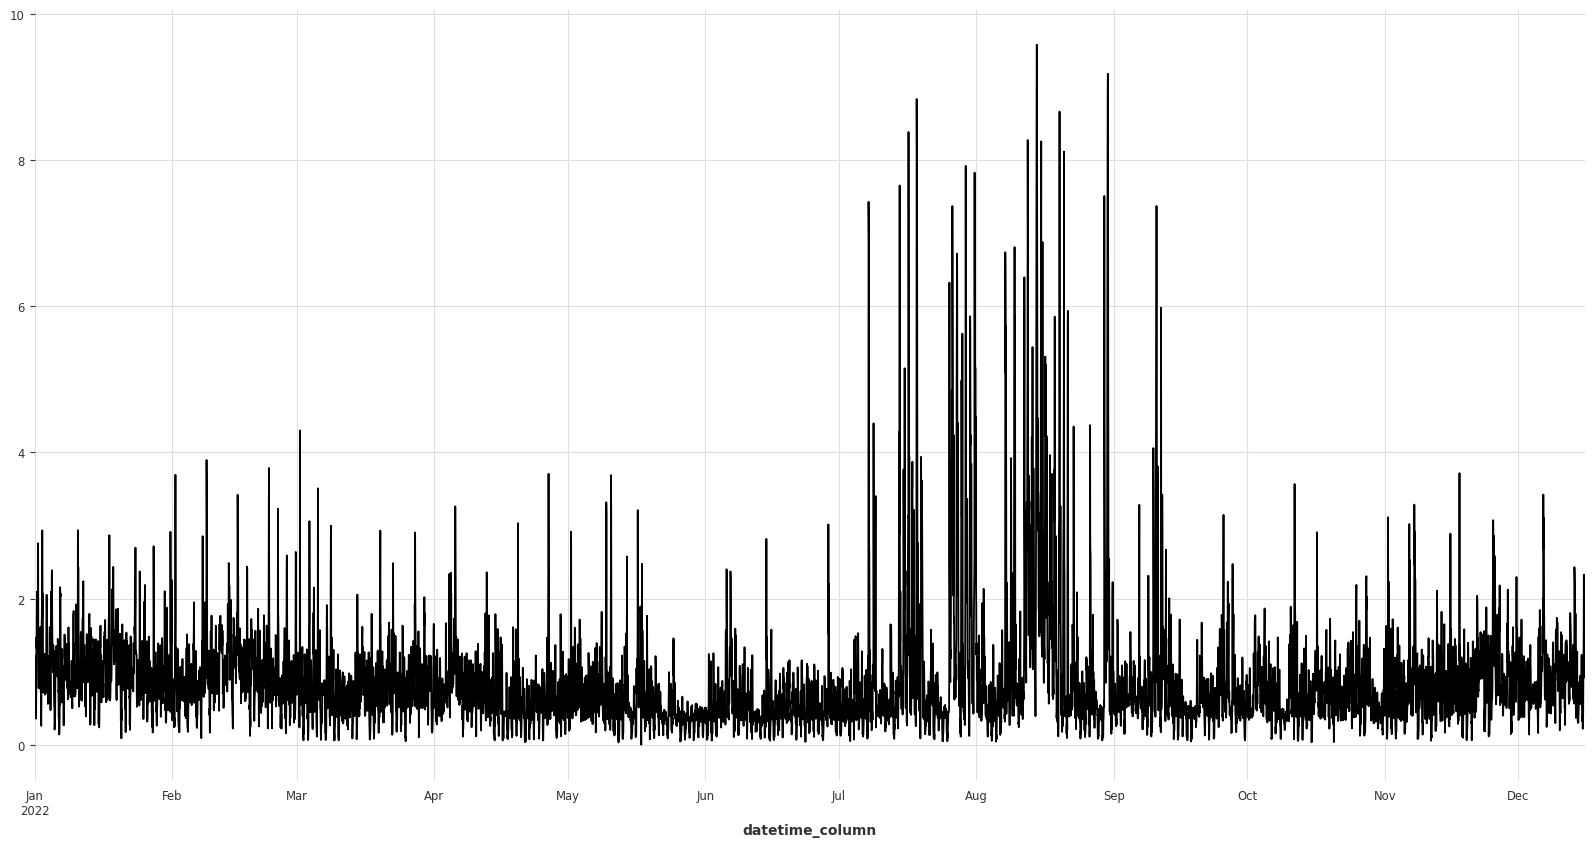

In [21]:
df_resampled['use [kW]'].plot(figsize=(20,10))

In [22]:
len(df), n_days_to_consider*24*60, len(df_resampled), len(df_resampled)*60


(502560, 502560, 8376, 502560)

In [23]:
df_resampled.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'humidity', 'visibility', 'apparentTemperature', 'pressure',
       'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability'],
      dtype='object')

In [24]:
# Measure amount of correlation with the target columns
# Specify the target column name
target_column = 'use [kW]'

# Get list of columns except the target column
other_columns = [col for col in df_resampled.columns if col != target_column]


correlations = df_resampled[other_columns].corrwith(df_resampled[target_column])
sorted_columns = correlations.sort_values(ascending=False).index

print("Sorted columns based on correlation:")
print(sorted_columns)


Sorted columns based on correlation:
Index(['House overall [kW]', 'Furnace 2 [kW]', 'Furnace 1 [kW]',
       'Living room [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Dishwasher [kW]', 'Well [kW]', 'Wine cellar [kW]', 'Microwave [kW]',
       'Barn [kW]', 'Kitchen 38 [kW]', 'Kitchen 14 [kW]', 'Kitchen 12 [kW]',
       'Garage door [kW]', 'precipIntensity', 'dewPoint', 'windBearing',
       'pressure', 'humidity', 'temperature', 'apparentTemperature',
       'visibility', 'windSpeed', 'precipProbability', 'Solar [kW]',
       'gen [kW]'],
      dtype='object')


<ipython-input-24-cf0c2269d766>:9: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_resampled[other_columns].corrwith(df_resampled[target_column])


In [25]:
target_series = TimeSeries.from_dataframe(df_resampled, 'time', 'use [kW]')

list_of_past_covariates = ['Furnace 2 [kW]', 'Furnace 1 [kW]', 'Living room [kW]', 'Home office [kW]', 'Fridge [kW]']
list_of_future_covariates = ['temperature', 'humidity', 'apparentTemperature', 'dewPoint']

past_covariates = TimeSeries.from_dataframe(df_resampled, 'time', list_of_past_covariates)
future_covariates = TimeSeries.from_dataframe(df_resampled, 'time', list_of_future_covariates)


In [26]:
num_test = 24*1
target_series_train, target_series_test = target_series[:-num_test], target_series[-num_test:]

In [27]:
n_lags = num_test*7
model = LightGBMModel(lags=n_lags, \
                      output_chunk_length=num_test, \
                      lags_past_covariates=[-n_lags]*past_covariates.n_components,\
                      lags_future_covariates=[-n_lags]*future_covariates.n_components)

In [28]:
model.fit(series=target_series_train, \
          past_covariates=past_covariates,\
          future_covariates=future_covariates)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53295
[LightGBM] [Info] Number of data points in the train set: 8161, number of used features: 209
[LightGBM] [Info] Start training from score 0.854336
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53295
[LightGBM] [Info] Number of data points in the train set: 8161, number of used features: 209
[LightGBM] [Info] Start training from score 0.854288
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53295
[LightGBM] [Info] Number of data points in the train set: 8161, number of used features: 209
[LightGBM] [Inf

LightGBMModel(lags=168, lags_past_covariates=[-168, -168, -168, -168, -168], lags_future_covariates=[-168, -168, -168, -168], output_chunk_length=24, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None)

In [35]:
target_series_test_pred = model.predict(num_test, \
                                        past_covariates=past_covariates,\
                                        future_covariates=future_covariates)

In [36]:
from darts.models import NaiveSeasonal
naive_model = NaiveSeasonal(K=1)
naive_model.fit(target_series_train)
naive_forecast = naive_model.predict(num_test)

<Axes: xlabel='time'>

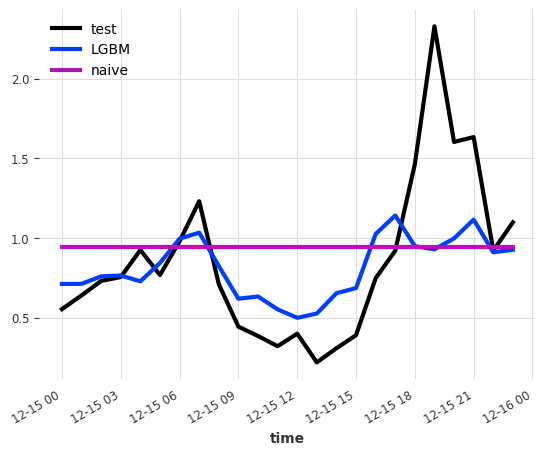

In [37]:
#target_series_train.plot(label='training')
target_series_test.plot(label='test', lw=3)
target_series_test_pred.plot(label='LGBM', lw=3)
naive_forecast.plot(label='naive', lw=3)

In [38]:
from darts.metrics.metrics import mape

In [39]:
mape(target_series_test, target_series_test_pred)

36.63561350413098

In [40]:
mape(target_series_test, naive_forecast)

72.65457486870126